<a href="https://colab.research.google.com/github/MBD-PT-3rd-term-IE/deep_learning_mbd_pt_2023/blob/main/yolov8_street_object_detector_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

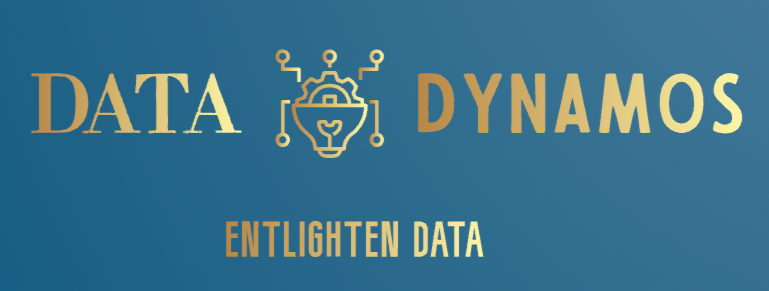

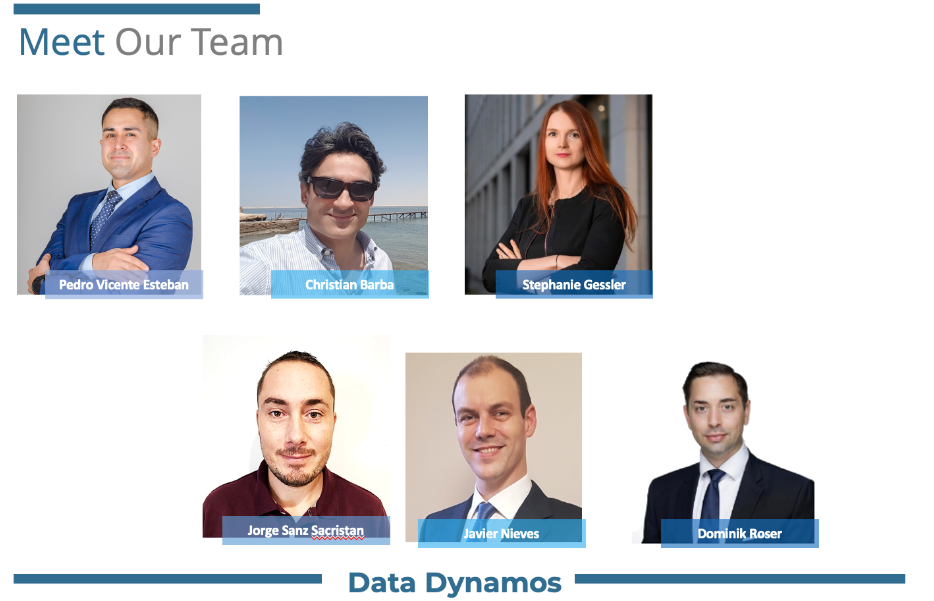



```
=====================================================
________          STREET OBJECT              ________
________- - - - - - - - - - -  - - - - - - - ________
________            DETECTION                ________
=====================================================
```



# Summary

This is a computer vision project detects street objects as you walk past them identifying a total of 12 categories trained over a 1200 picture dataset leveraging the yolov8 framework.

This deep learning project uses transfer learning to train yolov8 on our new dataset. We are not using the COCO dataset as a starting point as it contains many categories irrelevant to our use case. Instead, an 80% of the dataset has been authored by Data Dynamos while the remaining 20% is a recopilation from pictures available in platform Roboflow. 

The Roboflow platform has been used to upload the pictures and label them in the cloud. This had the advantage to allow for parallel work as pictures were hosted in Roboflow's cloud maintaining a single source of truth. LabelImg was disregarded for this reason. Roboflow also allows preprocessing steps, augmentations and training options which came handy besides the labeling.

In order to use the latest yolov8, this notebook uses the original structure from Roboflow. The Android implementation uses yolov5s and will be implemented in a different fashion (see notebook yolov5)





# GitHub Repos

- Ultralytics
https://github.com/ultralytics/ultralytics

- Roboflow Notebooks
https://github.com/roboflow/notebooks

# Table of Contents

1. Preparations
2. Downloading yolov8
3. Inference with yolov8 (COCO)
4. Downloading dataset from Roboflow
5. Training Model with Transfer Learning
6. Inference with Model
7. Exporting Model to Other Formats

# 1. Preparations

## 1.1  Checking for Nvidia Tesla



Snippet to see which graphic card is assigned to this runtime in Google Colab

In [ ]:
!nvidia-smi

Sat Mar 18 22:34:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0    28W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 1.2 Importing OS commands to navigate

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


# 2. Downloading yolov8


We are using the latest version of yolo, yolov8. Upon installation we can choose from v8s and v8n:

- YOLOv8s is a more recent version of the YOLO object detection algorithm, released in 2020. It is based on the YOLOv3 architecture and uses an improved Darknet-53 backbone network. YOLOv8s is designed to be more accurate and faster than its predecessor, YOLOv3.

- YOLOv8n is an improved version of YOLOv8s that uses a new network architecture called SPP-Net. It is designed to be more accurate and faster than YOLOv8s, and it is the latest version of the YOLO object detection algorithm.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.54 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.5/78.2 GB disk)


Above we see the version of ultralytics installed. As in March 2023, we need to have v8.0.53 installed to leverage support for exporting later the model to tflite for Android deployment

Please bear in mind if this version is not 8.0.53 tflite export might not be available!

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## 2.1 Using ultralytics commands for yolo

Here are the commands that we can use 
```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

We must use this syntax:

!yolo xxx=yyy, zzz=aaa ...





Note that cloning git repo will result in a different syntax having to navigate into the yolo directory and calling python scripts

# 3. Inference with Pre-trained COCO Model

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.



In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 21.6MB/s]
Ultralytics YOLOv8.0.54 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 23.5MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 14.5ms
Speed: 0.5ms preprocess, 14.5ms inference, 46.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


We will use now yolov8n to detect in a random picture a dog and a person just to show yolov8 is downloaded and working

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 17.0ms
Speed: 0.5ms preprocess, 17.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
results[0].boxes.xyxy

tensor([[   0.00000,  314.47144,  625.07556, 1278.19458],
        [  55.17310,  250.02206,  648.10803, 1266.27185],
        [ 633.22913,  719.53912,  701.05383,  786.03363]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.72712, 0.29066, 0.28456], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

# 4. Downloading our dataset + labels from Roboflow

Here we link our API key from Roboflow for a dataset prepared to work with yolov8. Up until here we have done the following tasks in the pipeline:

- Labeling 1000 + pictures to a very specific use case
- Adjusted final resolution of the pictures to 800x800 (yolov8)
- Scaling the pictures with black edges for 16:9 and 4:3
- Optimizing pictures (preprocessing)
    - Auto-Orient: Applied
    - Resize: Fit (black edges) in 640x640
- Modify Classes: 15 remapped, 15 dropped
- Creating augmentations
- Preparing dataset for yolov8 (labels)


LABELS USED:
- bench
- bike
- bin
- bush
- car
- crosswalk
- fence
- minipole
- person
- pole
- scooter
- tree
- truck
- wall

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 KB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
rf = Roboflow(api_key="ow5C8sx8oFEDnaMQ6CNv")
project = rf.workspace("data-dynamos").project("streets-and-crosswalks")
#do change if another version of dataset is used
dataset = project.version(35).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.54, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Streets-and-Crosswalks-35 in yolov8:: 100%|██████████| 2364/2364 [00:00<00:00, 2584.80it/s]


The dataset is now downloaded in our Colab Runtime.

Please make sure you have the following subdirectories
- test
- train
- valid

You should also check the yaml file is pointing to the right directory (automatically done in Colab)

# 5. Training Model with Transfer Learning

As seen above, we use the syntax for training on our labeled dataset. Here are the main hyperparameters modified for this training run, please make sure you are running a Runtime with a Tesla Nvidia GPU for faster results:

- Object detection. We can also do classification and segmentation tasks though this is not the core of this project
- Train. We are using the train set. The dataset as it comes from Roboflow is splitted in
    - Train 797 images
    - Validation 230 images
    - Test 149 images
- Yolov8n. Based in yolov3 architecture and using an improved version of darknet53. Faster than yolov8s and more accurate
- 80 epochs. Times it will be trained to gain accuracy
- imgsize 800. The size of pictures as it came from dataset in Roboflow
- batch=10 The batch parameter in YOLOv8 is a hyperparameter that determines the number of images to be processed in a single training step. This parameter is used to control the speed of the training process and to reduce overfitting.
- patience=10. Max number of epochs model will attempt to give if it doesn't see any further improvement after a few epochs


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=60 imgsz=800 batch=10 patience=10 lr0=0.007 plots=True

/content
Ultralytics YOLOv8.0.54 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/Streets-and-Crosswalks-35/data.yaml, epochs=60, patience=10, batch=10, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False

## 5.1 Confusion Matrix

/content


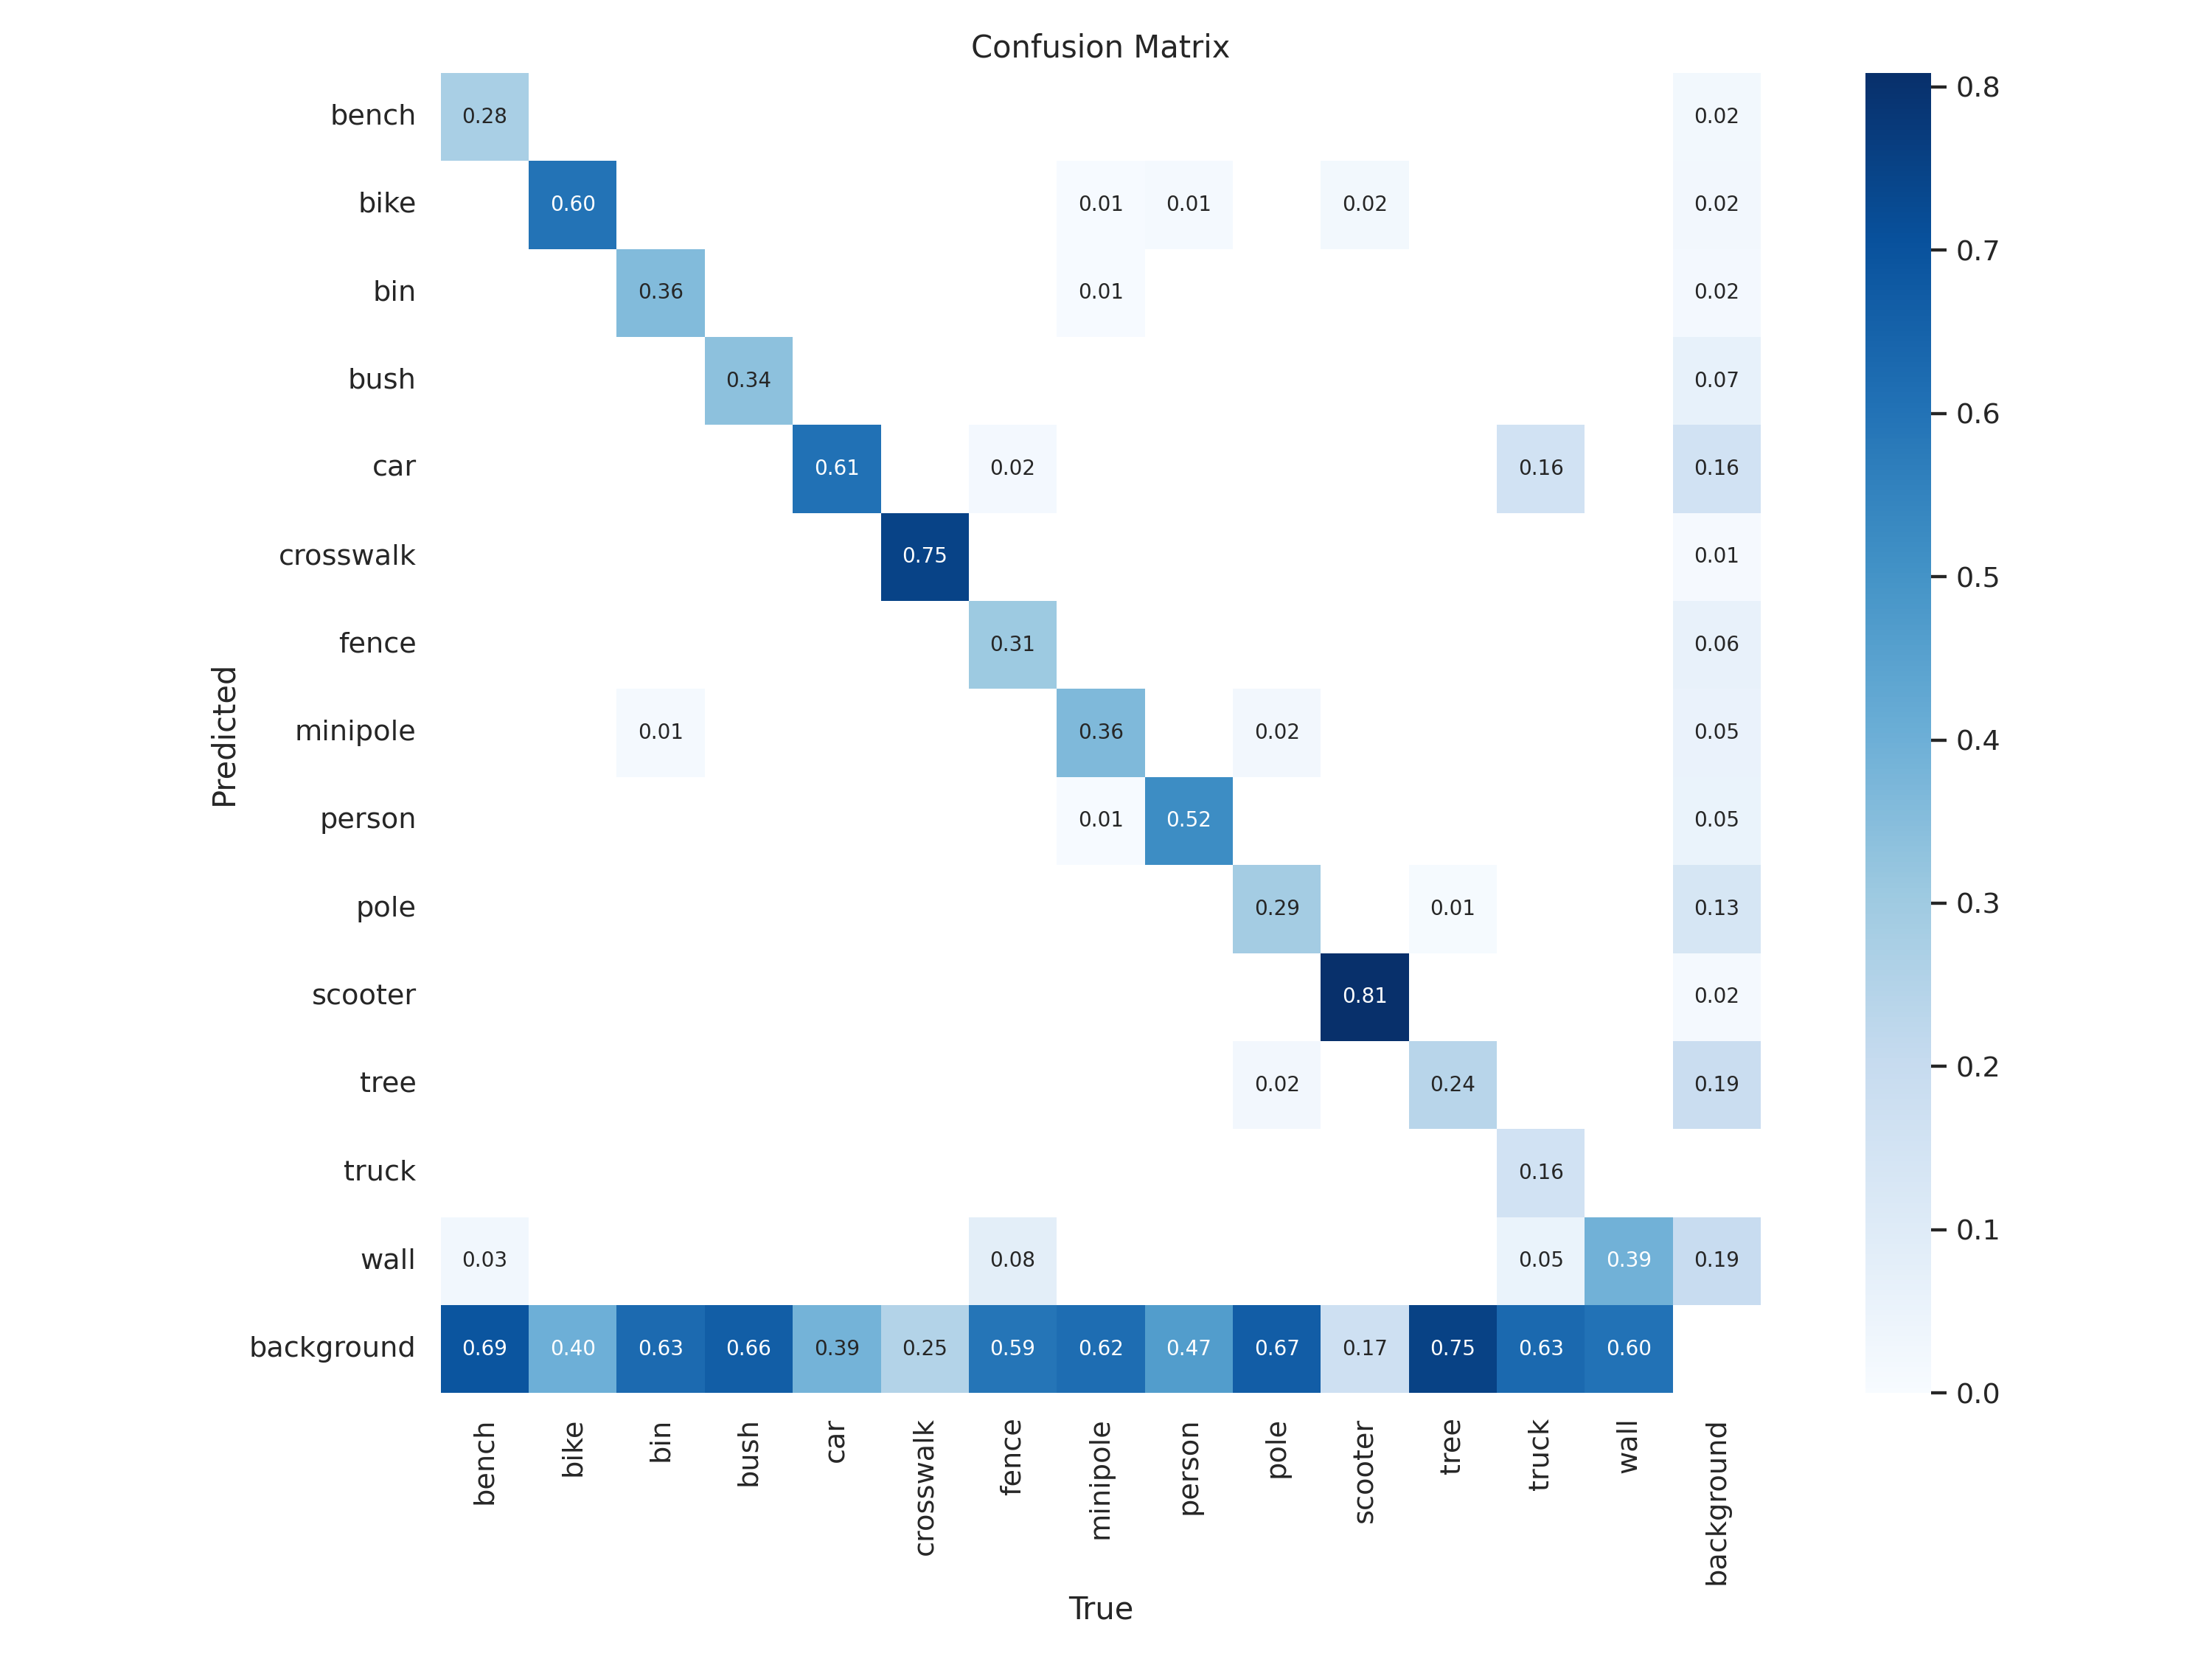

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

## 5.2 Metrics

/content


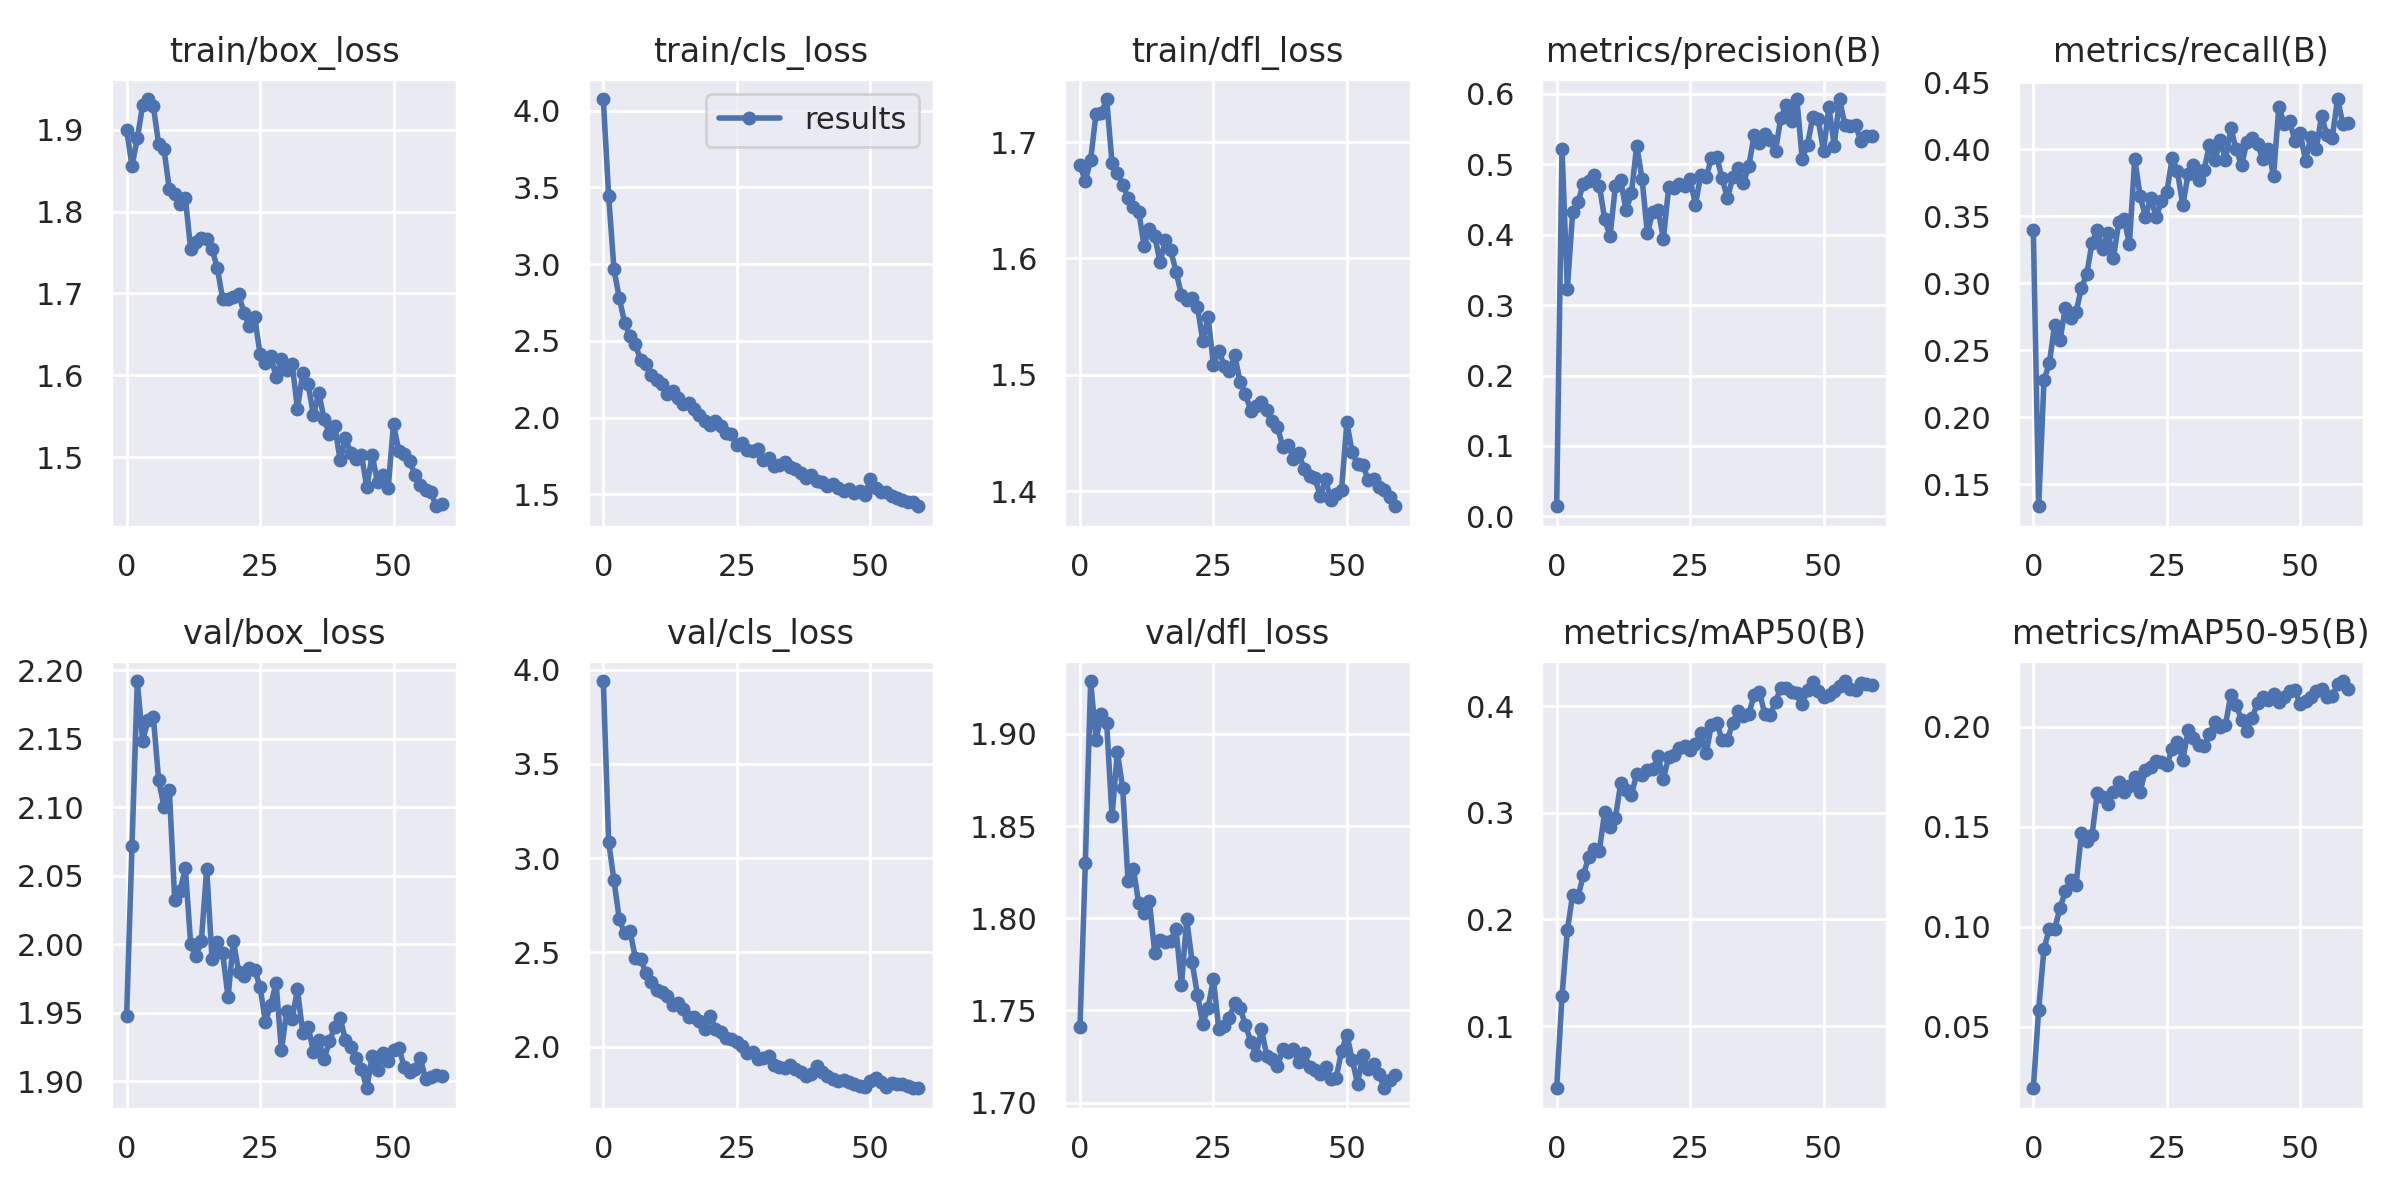

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

## 5.3 Checking Model Performance in Validation Images

/content


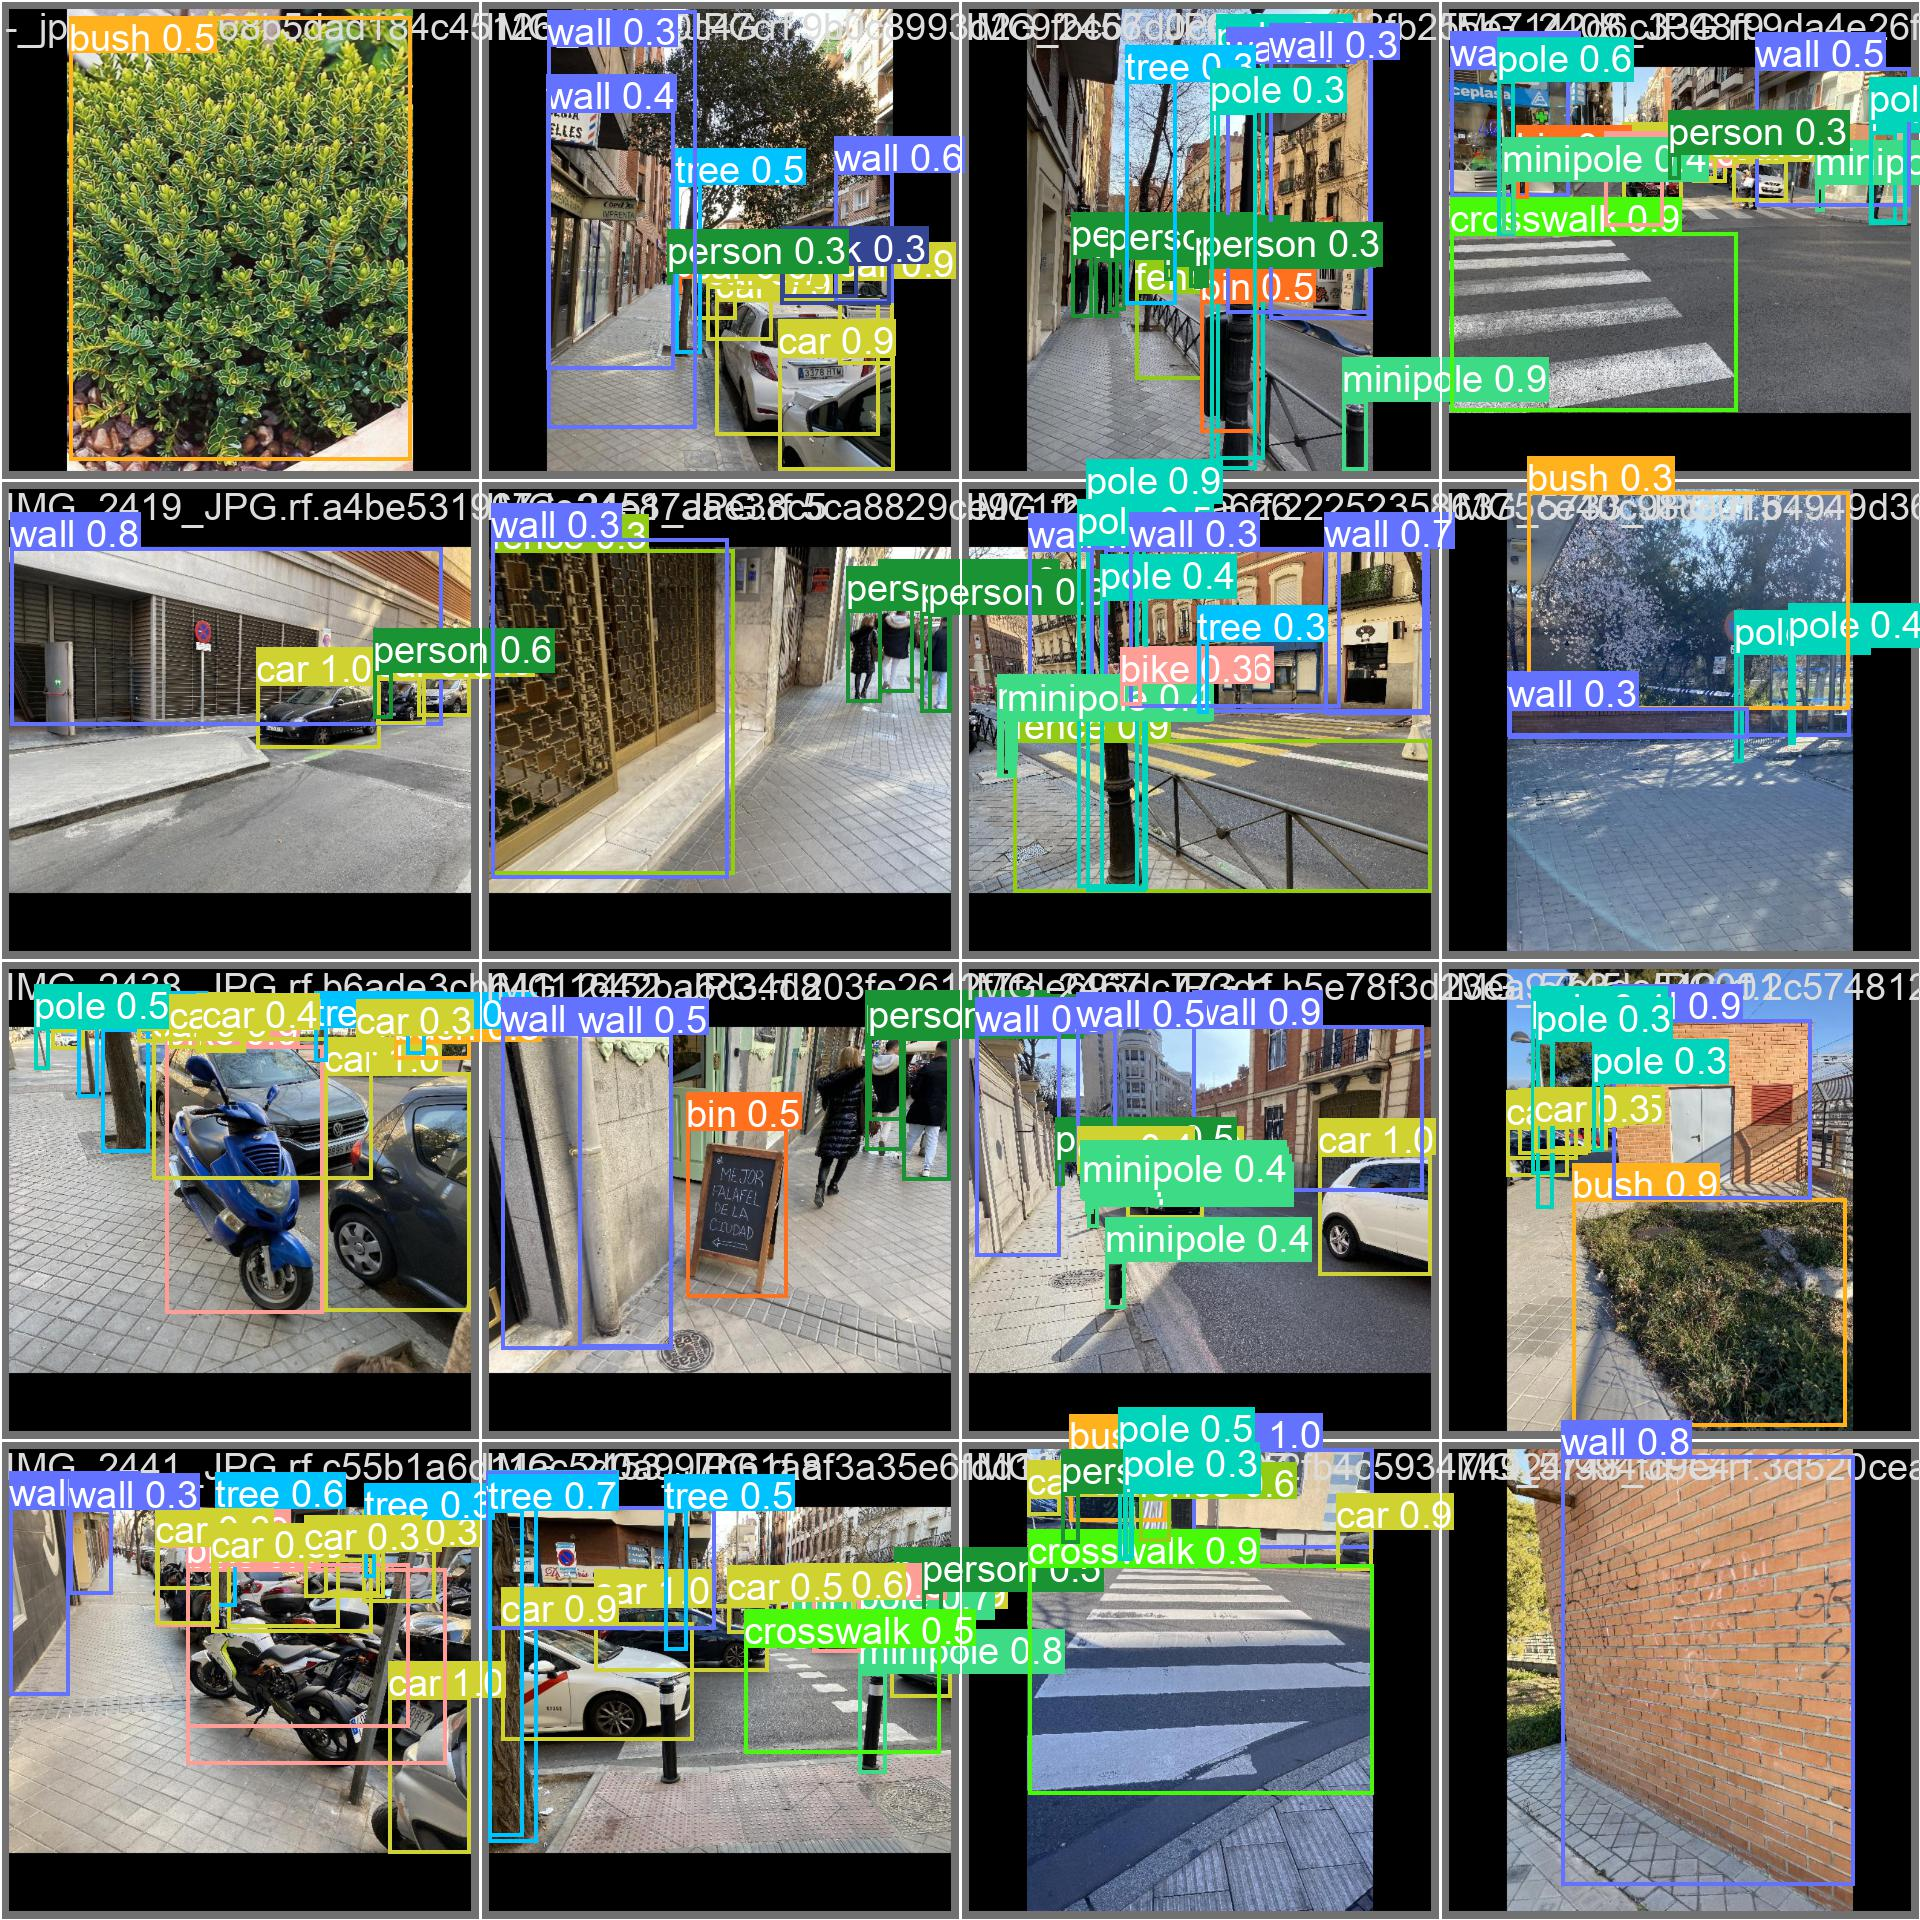

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## 5.4 Validating Custom Model against Roboflow

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.54 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008378 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/Streets-and-Crosswalks-35/valid/labels.cache... 230 images, 0 backgrounds, 0 corrupt: 100% 230/230 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 27, len(boxes) = 2286. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [00:12<00:00,  1.18it/s]
                   all        230       2286      0.543      0.417      0.421      0.224
                 bench        230         36      0.359       0.25      0.267      0.159
                  bike        230         75      0.686        0.6      0.601      0.313
            

# 6. Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.54 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008378 parameters, 0 gradients, 8.1 GFLOPs

image 1/149 /content/datasets/Streets-and-Crosswalks-35/test/images/106_png.rf.61248d11fd9d35feca70f1c2946a5944.jpg: 800x800 1 scooter, 14.2ms
image 2/149 /content/datasets/Streets-and-Crosswalks-35/test/images/108_png.rf.0b164b5de74d6a424f66152a0df9cce6.jpg: 800x800 1 scooter, 12.9ms
image 3/149 /content/datasets/Streets-and-Crosswalks-35/test/images/109_png.rf.cc447de5aea55edd4e260db9ef62b12e.jpg: 800x800 1 person, 1 scooter, 1 wall, 12.9ms
image 4/149 /content/datasets/Streets-and-Crosswalks-35/test/images/11-2-_png.rf.41c4c43f51f0b0b2067e4dc8ae6c8e89.jpg: 800x800 2 bins, 1 bush, 1 pole, 2 scooters, 12.9ms
image 5/149 /content/datasets/Streets-and-Crosswalks-35/test/images/122-2-_png.rf.c9c0e20a43edd87a489764a49921d20a.jpg: 800x800 1 car, 1 scooter, 12.9ms
image 6/149 /content/datasets/Streets-and-Crosswalks-3

Let's take a look at few results.

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics<=8.0.20 is required but found version=8.0.54, to fix: `pip install ultralytics<=8.0.20`
An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


## 6.1 Video Inference

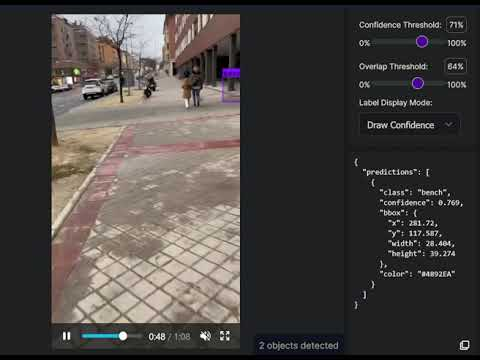

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('un6Jo4kt9Ik')

# 7. Exporting our Model 



## 7.1 Tflite

TFLite is needed for mobile applications in computer vision because it is an optimized version of TensorFlow that is designed for mobile and embedded devices. It is lightweight and fast, making it ideal for running on mobile devices with limited memory and processing power. Additionally, it supports a variety of hardware accelerators, such as GPUs and specialized AI chips, to further increase performance

This snippet will export the pytorch model under train/weights
The steps it follows are the following:
- Converts from Pytorch to Onnx
- Converts from Onnx to tflite
- Stores new model under train/weights

In [ ]:
!yolo export model={HOME}/runs/detect/train/weights/best.pt format=tflite


Ultralytics YOLOv8.0.54 🚀 Python-3.9.16 torch-1.13.1+cu116 CPU
Model summary (fused): 168 layers, 3008378 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from /content/runs/detect/train/weights/best.pt with input shape (1, 3, 800, 800) BCHW and output shape(s) (1, 18, 13125) (6.0 MB)
2023-03-19 00:10:45.605739: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-19 00:10:47.147339: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/local/lib/python3.9/dist-packages/cv2/../

## 7.2 Preview of exported model
A preview of our new model using netron

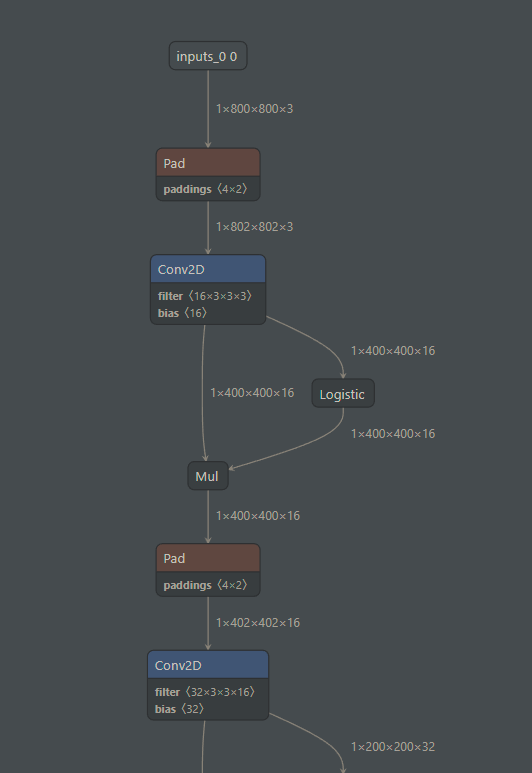

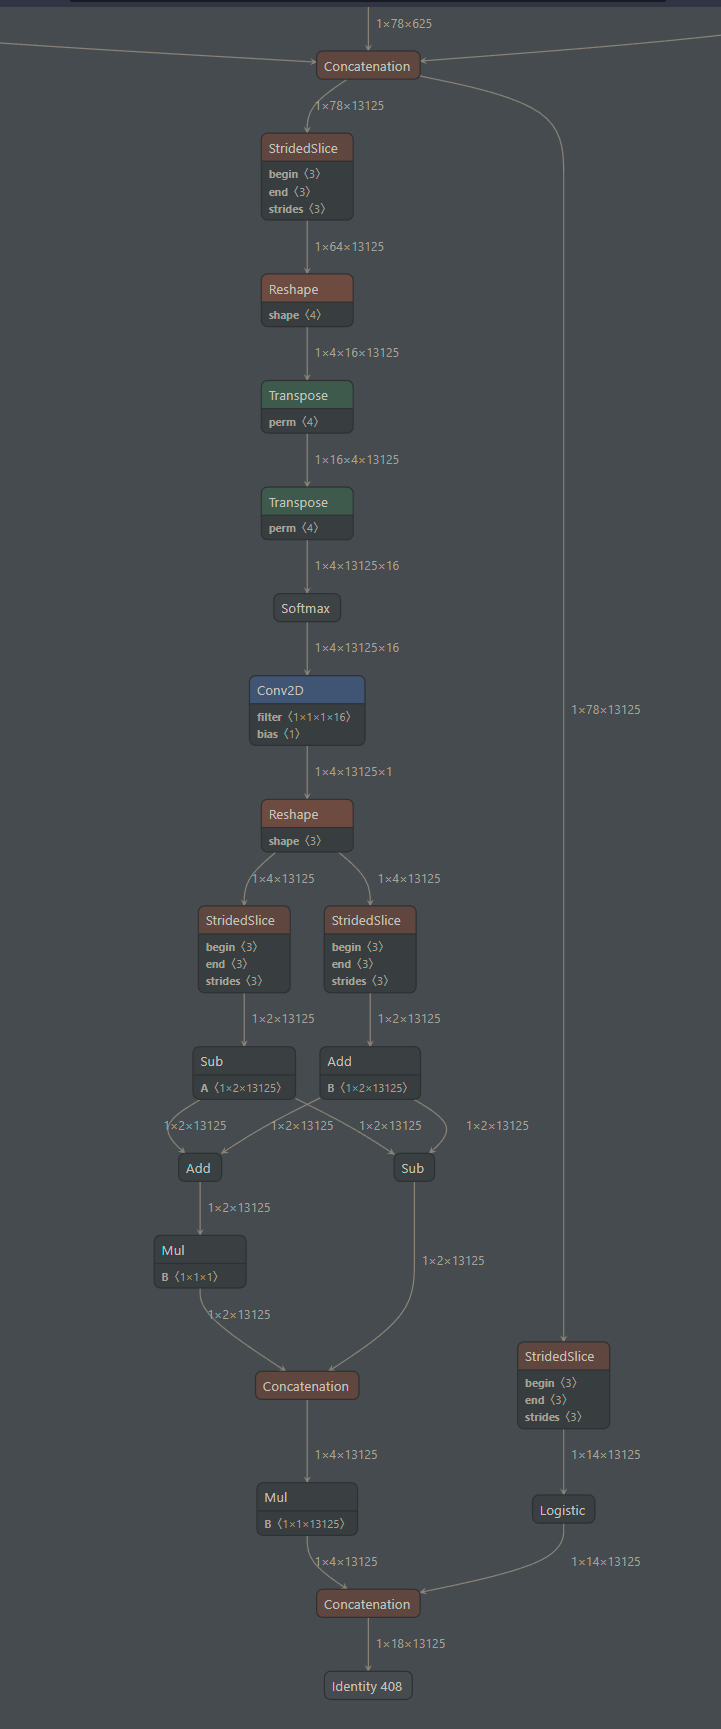